In [2]:
import numpy as np
import pandas as pd
import requests
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import keras.backend as K

In [3]:
df=pd.read_excel('/content/drive/MyDrive/rainyweather5.xlsx')
dff=df.drop(['t','Xbh5d1000','So5','Xs5','Xi5','Xp5','Xba5','Ss5','Xbh5','Sno5','Snd5','Salk5','ro1','ro2','ro3','ro6','ro3Eksik','deltaSnh5','carp'],axis=1)
dfff=dff.iloc[674:924]
data=np.array(dfff)
dfff



,Ss,Xs,Xi,Q,Snd,Xnd,Xbh,Snh,Snh5
674,61.71973,53.06900,224.37300,19620.0,6.17197,11.58900,30.82700,31.04771,20.6916
675,62.16018,51.46200,220.97300,19334.0,6.21602,11.38000,30.27000,31.67387,20.6137
676,64.57526,49.73000,217.74000,18978.0,6.45753,11.17200,29.71900,33.15925,20.5416
677,67.84871,47.19400,214.33900,18321.0,6.78487,10.92500,29.05900,35.11773,20.4856
678,72.14054,47.16000,219.92500,17855.0,7.21405,11.15600,29.67600,37.86587,20.4566
...,...,...,...,...,...,...,...,...,...
919,36.27527,42.52577,147.28598,43552.0,3.62753,7.92890,21.09037,15.11946,14.1397
920,36.19224,40.59736,146.58308,42693.0,3.61922,7.81894,20.79806,14.94988,13.7102
921,34.36216,33.82085,140.11000,40001.0,3.43622,7.26518,19.32548,13.77617,13.3275
922,32.61237,29.38727,133.85889,38269.0,3.26124,6.81895,18.13867,13.11120,12.9697


In [4]:
n=data.shape[0]
d=data.shape[1]

In [5]:
normalized_data=np.zeros((n,d))

for i in range(n):
  for j in range(d):
    normalized_data[i,j]=2*((data[i,j]-np.min(data[:,j]))/(np.max(data[:,j])-np.min(data[:,j])))-1


In [6]:
new_set= pd.DataFrame(normalized_data, columns = dfff.columns)

In [7]:
training_set=new_set.iloc[0:150]
test_set=new_set.iloc[150:]

x_test=test_set.iloc[:,:8].values
y_test=test_set.iloc[:,-1].values
x_train=training_set.iloc[:,:8].values
y_train=training_set.iloc[:,-1].values

deltaSnh=df.iloc[674:824,-1].values
ro3eksik=df.iloc[674:824,-8].values

In [11]:
def backnorm(x): 
  backnormOutput=(x+1)/2*(np.max(data[:,-1]-np.min(data[:,-1])))+np.min(data[:,-1])

  return backnormOutput

What does backnorm do?

In [ ]:
def custom_loss_function(data, y_pred):
    
   y_true=data[:,None,0]
   Ro3eksik=data[:,None,1]
   DeltaSnh=data[:,None,2]  
   squared_difference = tf.square((y_true - y_pred))
   mse = tf.reduce_mean(squared_difference, axis=-1)
   y_prednonscaled=backnorm(y_pred.numpy())
   phyloss3=tf.square(DeltaSnh+0.01042*(0.08+1/0.24)*Ro3eksik*y_prednonscaled/(1+y_prednonscaled))
   phyloss=tf.reduce_mean(phyloss3, axis=-1)
   
   return mse+0.0001*phyloss


In [12]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=25,activation='tanh',input_shape=(8,)))
model.add(keras.layers.Dense(units=25,activation='tanh',input_shape=(8,)))
model.add(keras.layers.Dense(units=1))
model.summary()

model.compile(loss='mse', optimizer='Adam', run_eagerly=True)
    
es=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                225       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(
        x_train,
        np.hstack((y_train.reshape((150,1)),ro3eksik.reshape((150,1)),deltaSnh.reshape((150,1)))),
        epochs=400, 
        batch_size=25, 
        shuffle=False,
        callbacks=[es])

Epoch 1/400
6/6 [==============================] - 0s 18ms/step - loss: 115.1469
Epoch 2/400
6/6 [==============================] - 0s 18ms/step - loss: 113.1570
Epoch 3/400
6/6 [==============================] - 0s 18ms/step - loss: 111.3268
Epoch 4/400
6/6 [==============================] - 0s 17ms/step - loss: 109.5195
Epoch 5/400
6/6 [==============================] - 0s 17ms/step - loss: 107.7188
Epoch 6/400
6/6 [==============================] - 0s 17ms/step - loss: 105.9223
Epoch 7/400
6/6 [==============================] - 0s 18ms/step - loss: 104.1347
Epoch 8/400
6/6 [==============================] - 0s 18ms/step - loss: 102.3659
Epoch 9/400
6/6 [==============================] - 0s 19ms/step - loss: 100.6297
Epoch 10/400
6/6 [==============================] - 0s 19ms/step - loss: 98.9425
Epoch 11/400
6/6 [==============================] - 0s 23ms/step - loss: 97.3211
Epoch 12/400
6/6 [==============================] - 0s 24ms/step - loss: 95.7819
Epoch 13/400
6/6 [==========

In [14]:
test_set_predictions = model.predict(x_test)
train_set_predictions = model.predict(x_train)

model_testpredictions = backnorm(test_set_predictions)
model_trainpredictions= backnorm(train_set_predictions)

actual_testset_values = backnorm(y_test)
actual_trainingset_values= backnorm(y_train)

5/5 [==============================] - 0s 3ms/step


Test MSE:  4140.326361870967
Train MSE:  3404.6940470828


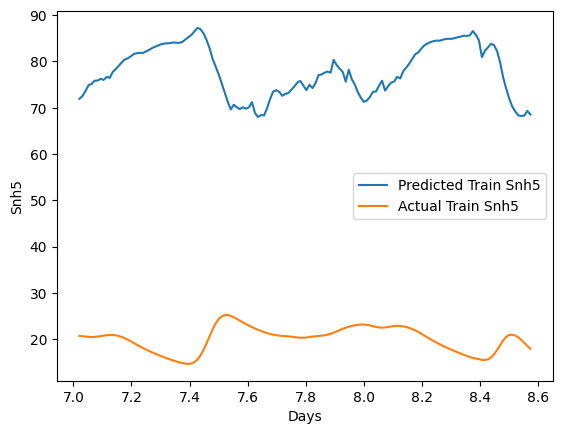

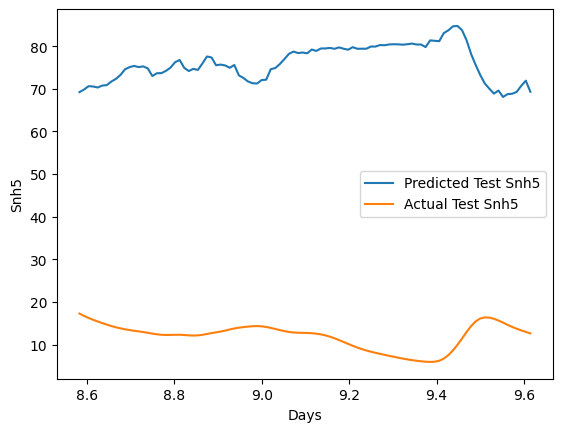

In [15]:
mse=metrics.mean_squared_error(actual_testset_values, model_testpredictions)


print('Test MSE: ', mse)
mse=metrics.mean_squared_error(actual_trainingset_values, model_trainpredictions)
print('Train MSE: ', mse)

fig,ax = plt.subplots()
x=df['t']
plt.plot(x[674:824,],model_trainpredictions, label='Predicted Train Snh5')
plt.plot(x[674:824,],actual_trainingset_values, label='Actual Train Snh5')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();
plt.show()

fig,ax = plt.subplots()
x=df['t']
plt.plot(x[824:924,],model_testpredictions, label='Predicted Test Snh5')
plt.plot(x[824:924,],actual_testset_values, label='Actual Test Snh5')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();

We couldn't interpret the test plot since we dont know the significance of the Snh5 amount.